Basic analyses of behavior in the FHT task. 

In [3]:
import sys
sys.path.append('/Users/angelaradulescu/Dropbox/research/thesis/code/analysis/libraries')
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

## 1. Load and prep behavioral data

In [4]:
behav_path = '/Users/angelaradulescu/Dropbox/research/thesis/data/3_ACAL-2/AllData.csv'
behav_data = pd.read_csv(behav_path)
subjects = behav_data['Subj'].unique()

## Get metadata.
n_trials = max(behav_data['Trial'])
n_games = max(behav_data['Game'])
game_length = len(behav_data.loc[(behav_data['Subj'] == 1) & (behav_data['Game'] == 1)])

## Add trial-within-game variable.
behav_data['Trial_2'] = behav_data['Trial'] - (behav_data['Game']-1)*game_length
behav_data.head(5)

,Subj,Trial,Game,Stim11,Stim12,Stim13,Stim21,Stim22,Stim23,Stim31,...,Outcome,Dim,Feat,CenterDim,CenterFeat,Correct,LearnedFeat,PoL,RT,Trial_2
0,1,1,1,2,4,9,1,5,7,3,...,1.0,2,5,1,1,0,9.0,20,1.97010,1
1,1,2,1,2,5,9,3,6,8,1,...,NaN,2,5,1,3,0,9.0,20,NaN,2
2,1,3,1,2,5,7,1,4,9,3,...,0.0,2,5,1,1,1,9.0,20,0.57229,3
3,1,4,1,3,5,9,2,6,7,1,...,1.0,2,5,1,2,1,9.0,20,0.76743,4
4,1,5,1,2,5,9,1,6,8,3,...,1.0,2,5,1,1,1,9.0,20,0.71366,5


## 2. Plot learning curves

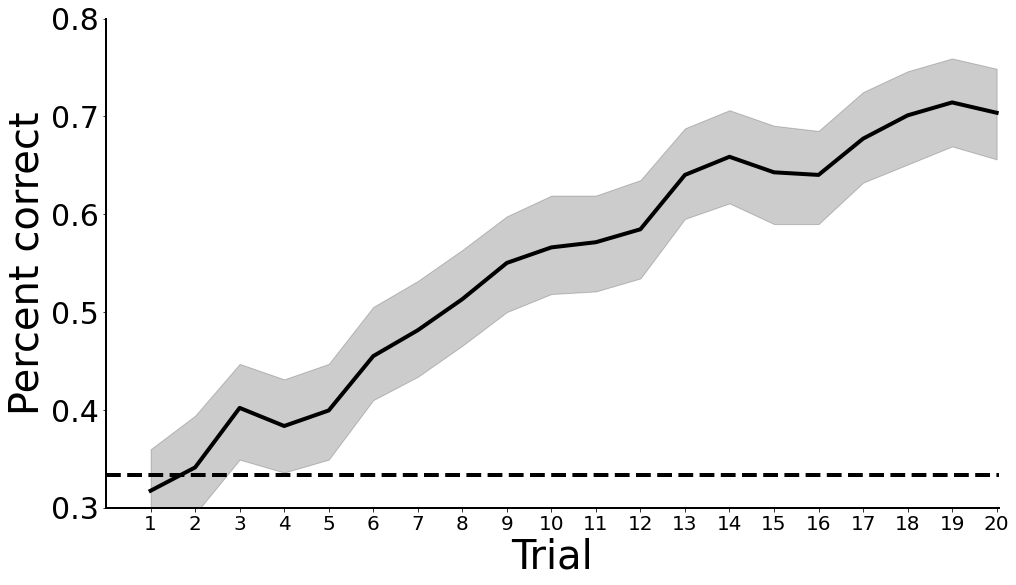

In [5]:
df = pd.melt(behav_data, col_level=0, id_vars='Trial_2', value_vars=['Correct'])

fig, ax = plt.subplots(figsize=(16,9))
ax.axhline(y=1/3, color='k', lw=4, linestyle='--');
sns.lineplot(x = "Trial_2", y="value", err_style="band", ci=95, data=df, lw=4, legend=False, color='black')
sns.despine()
ax.set_xlim([0,game_length+.05])
ax.set_ylim([0.3,0.8])
ax.set_xticks(np.arange(game_length)+1)
xl = ax.set_xlabel('Trial',fontsize = 40);
yl = ax.set_ylabel('Percent correct',fontsize = 40);
for axis in ['top','bottom','left','right']:
      ax.spines[axis].set_linewidth(2)
ax.tick_params(axis='x',colors='k')
plt.xticks(fontsize=20);
plt.yticks(fontsize=30);

## 3. Plot number correct in last 6

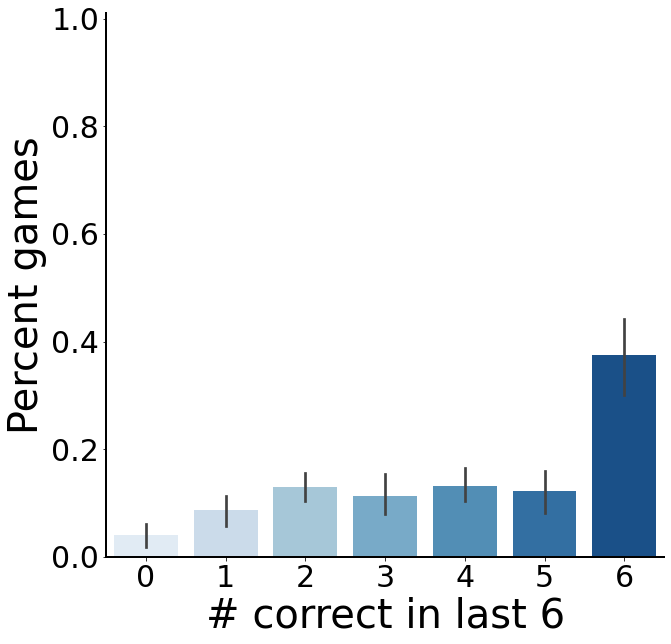

In [6]:
last_6 = np.arange(game_length-6,game_length)+1

df = behav_data.loc[behav_data['Trial_2'].isin(last_6)]
df = df.reset_index(drop=True)
df = df[['Subj','Game','Trial_2','Correct']]

## Sum corrects in last 6 within game.
df = df.groupby(['Subj','Game'])['Correct'].sum().reset_index()

## Count and normalize by number of games.
df = df.groupby(['Subj','Correct']).count().unstack(fill_value=0).stack().reset_index()
df['Game'] = df['Game'] / n_games

fig, ax = plt.subplots(figsize=(10,10))
sns.barplot(x="Correct", y="Game", data=df, palette="Blues",ci=95);
sns.despine()
ax.set_ylim([0,1.01])
xl = ax.set_xlabel('# correct in last 6',fontsize = 40);
yl = ax.set_ylabel('Percent games',fontsize = 40);
for axis in ['top','bottom','left','right']:
      ax.spines[axis].set_linewidth(2)
ax.tick_params(labelsize=30)